# 0. Run the backtest code

In [1]:
# Rb 5min test
!python ../Main.py  

OUTPUTDIR --> C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results


{'symbol': 'rb', 'SignalPrice': 'AvePrice2', 'TrainPrice': 'AvePrice2', 'TestPrice': 'MidPrice', 'price_threshold': 0.001, 'threshold': 0, 'threshold_type': 1, 'tca': 'Fixed', 'fixed_cost': 0, 'frequency': 15, 'offset': 0.1, 'start': '2016-01-01', 'split': '2016-07-01', 'valid_split': '2016-10-01', 'end': '2016-12-31'}
rb1605 C:/Users/Shufang/Documents/Qishi_QR/data//rb
0.001
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
rb1610 C:/Users/Shufang/Documents/Qishi_QR/data//rb
0.001
ID trade_range transition_begin transition_end
1610 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
rb1701 C:/Users/Shufang/Documents/Qishi_QR/data//rb
0.001
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-07-01 00:00:00 2016-

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

# 1. Rb - 15min 

In [3]:
Rb_15min_result = GetResult("C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold1/")


Tester= 0 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_0.pkl

Tester= 1 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_1.pkl

Tester= 2 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_2.pkl

Tester= 3 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_3.pkl

Tester= 4 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_4.pkl

Tester= 5 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_5.pkl

Tester= 6 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15min_PriceThreshold3\Result_6.pkl

Tester= 7 |file_path =  C:/Users/Shufang/Documents/Qishi_QR/BacktestEngine/Engine/Results/Rb_15m

## 1.0 Rb - 15min offset average - group test results by price threshold

In [4]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Rb_15min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# NO trading cost

## 2.0 Rb - 5min offset average - price threshold = 10bps

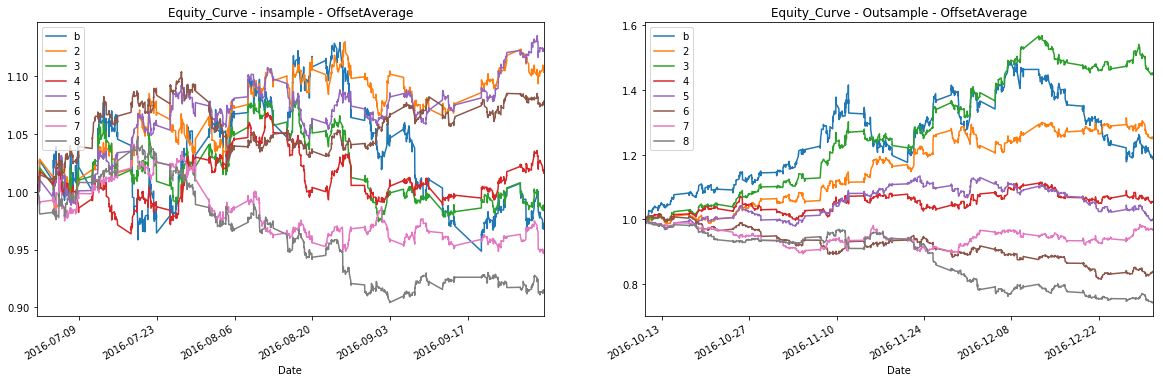

In [6]:
Rb_15min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Rb_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Rb_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [7]:
Rb_15min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.309415,0.001628,-0.004096,NaN,-0.000324,-0.015283,0.028135,-0.115108,NaN,1.351232,408.4,1.100433,0.323653
1,0.297590,-0.000179,-0.005102,NaN,-0.000600,-0.021081,0.029163,-0.156066,NaN,-0.108903,277.2,0.984550,0.336424
2,0.306791,0.000304,-0.004608,0.005775,0.000051,-0.025789,0.034515,-0.135115,1.257082,0.299138,459.6,1.011339,0.439790
3,0.306383,0.001865,-0.004547,0.005343,0.000260,-0.024667,0.032872,-0.134312,1.174700,1.541257,486.4,1.121790,0.478702
4,0.318793,0.001202,-0.004973,0.005307,0.000165,-0.028227,0.032626,-0.147691,1.068134,0.972832,460.4,1.070443,0.489765
5,0.321281,-0.000800,-0.005499,0.005473,-0.000125,-0.032823,0.031914,-0.200333,1.000947,-0.617634,398.2,0.943618,0.481519
6,0.301205,-0.001353,-0.006389,0.005979,-0.000251,-0.038967,0.032693,-0.211209,0.941204,-1.149142,311.6,0.915944,0.485583


In [8]:
Rb_15min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.451593,0.003922,NaN,0.057193,0.025691,-0.025429,0.098136,-0.147681,NaN,2.191071,408.4,1.243826,0.424168
1,0.441944,0.006370,NaN,0.056019,0.024967,-0.026572,0.100344,-0.137499,NaN,3.765759,250.0,1.451922,0.454537
2,0.438871,0.000993,-0.006274,0.007389,0.000128,-0.043451,0.048017,-0.218330,1.200759,0.530228,469.6,1.063204,0.460133
3,0.414852,0.000106,-0.006200,0.006753,0.000021,-0.040885,0.043897,-0.217068,1.093883,-0.189925,478.6,1.001040,0.469829
4,0.433312,-0.002851,-0.006983,0.006564,-0.000378,-0.048423,0.046406,-0.302854,0.946423,-1.967615,454.2,0.850308,0.479109
5,0.446547,-0.000477,-0.007269,0.007159,-0.000074,-0.046966,0.044158,-0.228090,0.989504,-0.513382,407.4,0.977084,0.489532
6,0.456543,-0.004847,-0.009041,0.007206,-0.000911,-0.058547,0.049972,-0.332449,0.799244,-2.763580,316.8,0.751018,0.489903


## 2.1  Rb - 15min offset average - price threshold = 5bps

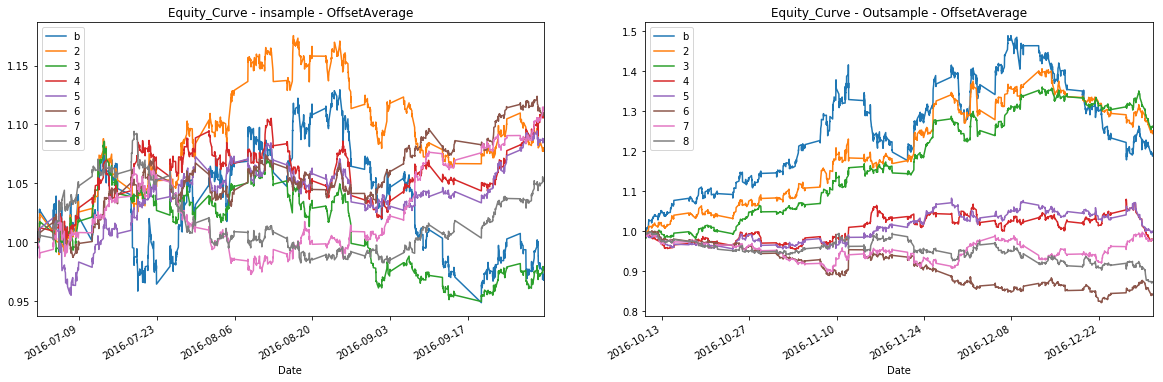

In [9]:
Rb_15min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Rb_15min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Rb_15min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

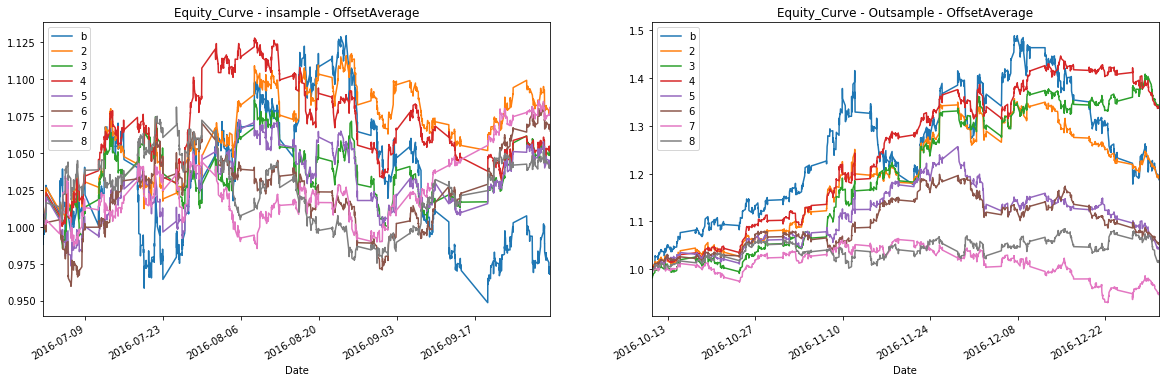

In [11]:
Rb_15min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0e-4])

Benchmark = Rb_15min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Rb_15min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

---

# Fixed Trading Cost
## 3.0 Rb - 15min offset average - price threshold = 10bps - Fixed cost


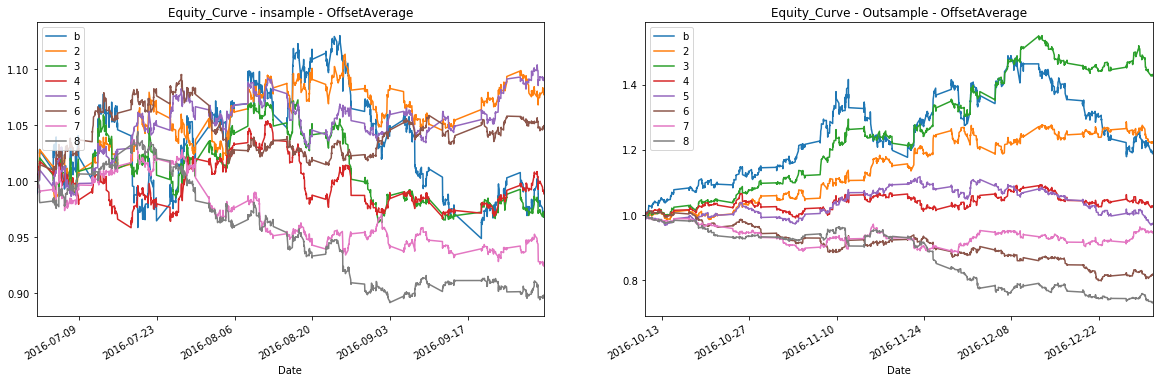

In [10]:
FixedCost_Rb_15min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[10e-4])

Benchmark = FixedCost_Rb_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = FixedCost_Rb_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

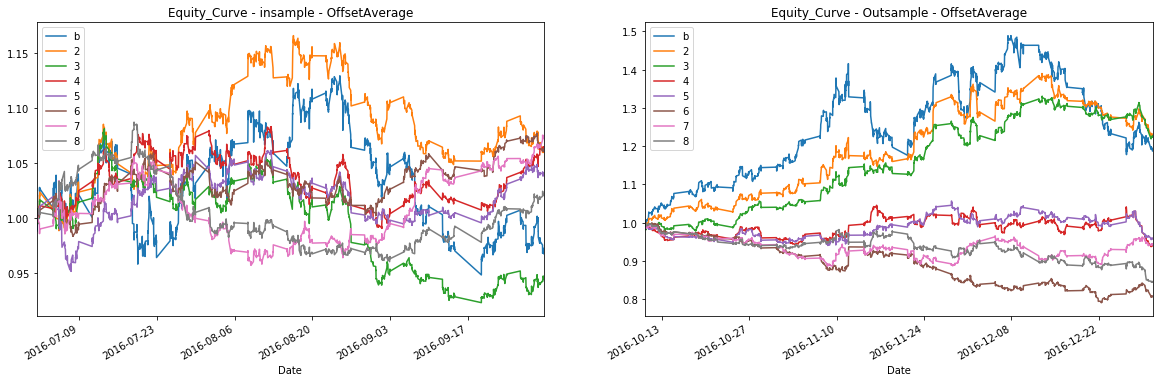

In [12]:
FixedCost_Rb_15min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[5e-4])

Benchmark = FixedCost_Rb_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = FixedCost_Rb_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

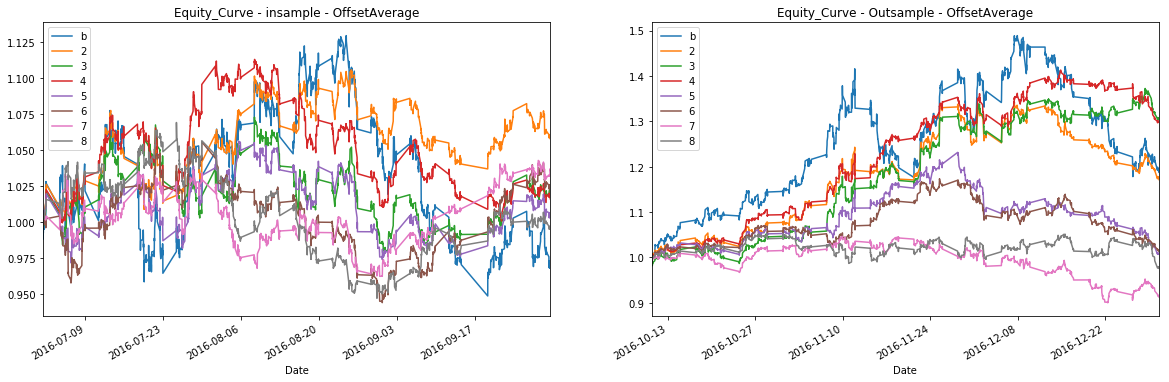

In [13]:
FixedCost_Rb_15min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[0])

Benchmark = FixedCost_Rb_15min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = FixedCost_Rb_15min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

## summary

 - fixed cost: order = 2 model works best and consistent for in-sample and out-sample performance.
 - no cost: order = 2 model best as well.